In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
import matplotlib
%matplotlib inline
rcParams['figure.figsize'] = (10, 10)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:/Users/Secretgarden/Downloads/DF/光伏电站/public.train.csv',engine= 'python')

### 对整体数据的描述

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
ID       9000 non-null int64
板温       9000 non-null float64
现场温度     9000 non-null float64
光照强度     9000 non-null int64
转换效率     9000 non-null float64
转化效率A    9000 non-null float64
转化效率B    9000 non-null float64
转化效率C    9000 non-null float64
电压A      9000 non-null int64
电压B      9000 non-null int64
电压C      9000 non-null int64
电流A      9000 non-null float64
电流B      9000 non-null float64
电流C      9000 non-null float64
功率A      9000 non-null float64
功率B      9000 non-null float64
功率C      9000 non-null float64
平均功率     9000 non-null float64
风速       9000 non-null float64
风向       9000 non-null int64
发电量      9000 non-null float64
dtypes: float64(15), int64(6)
memory usage: 1.4 MB
None


### 各变量的含义

![图片](colunms_info.png '各列变量的含义解释')

| 特征名 | 特征含义 |
| :------| ------: | 
| ID | 当前记录条数 |
| 板温 | 光伏电池板背测温度 |
| 现场温度 | 光伏电站现场温度 |
| 转换效率 | 计算得到的平均转换效率 |
| 转换效率A | 数据采集点A处的光伏板转换效率 |
| 转换效率B | 数据采集点B处的光伏板转换效率 |
| 转换效率C | 数据采集点C处的光伏板转换效率 |
| 转换效率D | 数据采集点D处的光伏板转换效率 |
|电压A|数据采集点A处汇流箱电压值|
|电压B|数据采集点B处汇流箱电压值|
|电压C|数据采集点C处汇流箱电压值|
|电压D|数据采集点D处汇流箱电压值|
|电流A|采集点A处汇流箱电流值|
|电流B|采集点B处汇流箱电流值|
|电流C|采集点C处汇流箱电流值|
|电流D|采集点D处汇流箱电流值|
|功率A|采集点A处的功率Pa，P=UI|
|功率B|采集点B处的功率Pa，P=UI|
|功率C|采集点C处的功率Pa，P=UI|
|功率D|采集点D处的功率Pa，P=UI|
|平均功率|为A、B、C三点功率的平均值：(Pa+Pb+Pc)/3|
|风速|为光伏电厂现场风速测量值|
|风向|为光伏电厂现场风的来向|

In [4]:
#经过查询资料  将无关变量ID，风向，风速剔除
del(df['ID'])
del(df['风向'])
del(df['风速'])

In [5]:
corrmat = df.corr()

In [6]:
corrmat

板温      现场温度      光照强度      转换效率     转化效率A     转化效率B     转化效率C  \
板温     1.000000  0.139478  0.701598 -0.042474 -0.061677 -0.017984 -0.036957   
现场温度   0.139478  1.000000  0.048602 -0.004786 -0.007324  0.004441 -0.023920   
光照强度   0.701598  0.048602  1.000000 -0.063524 -0.055868 -0.037378 -0.053962   
转换效率  -0.042474 -0.004786 -0.063524  1.000000  0.259582  0.922667  0.343944   
转化效率A -0.061677 -0.007324 -0.055868  0.259582  1.000000  0.007128  0.010054   
转化效率B -0.017984  0.004441 -0.037378  0.922667  0.007128  1.000000  0.055248   
转化效率C -0.036957 -0.023920 -0.053962  0.343944  0.010054  0.055248  1.000000   
电压A   -0.050288 -0.006645 -0.034018  0.222621  0.915609 -0.004461 -0.008341   
电压B   -0.027374  0.009308 -0.039653  0.629329 -0.008057  0.690200  0.023554   
电压C   -0.029050 -0.020063 -0.034769  0.246388 -0.009224 -0.008789  0.880619   
电流A    0.556378  0.017119  0.893803  0.013115  0.019380  0.009639 -0.001563   
电流B    0.039840 -0.002957  0.098228  0.220976  0.864720  0.005198 -0.000284   
电流C    0.071843  0.009810  0.105995  0.714525 -0.004982  0.778952  0.037707   
功率A    0.022859 -0.003602  0.074797  0.223420  0.907903 -0.001929 -0.006844   
功率B    0.041292  0.011573  0.063865  0.635174  0.004367  0.692766  0.024978   
功率C    0.055552 -0.016041  0.095069  0.254075 -0.008033  0.006506  0.858487   
平均功率   0.066586 -0.003102  0.130832  0.647332  0.533944  0.425414  0.442046   
发电量    0.519033  0.009822  0.879283 -0.052606 -0.041263 -0.033276 -0.041772   

            电压A       电压B       电压C       电流A       电流B       电流C       功率A  \
板温    -0.050288 -0.027374 -0.029050  0.556378  0.039840  0.071843  0.022859   
现场温度  -0.006645  0.009308 -0.020063  0.017119 -0.002957  0.009810 -0.003602   
光照强度  -0.034018 -0.039653 -0.034769  0.893803  0.098228  0.105995  0.074797   
转换效率   0.222621  0.629329  0.246388  0.013115  0.220976  0.714525  0.223420   
转化效率A  0.915609 -0.008057 -0.009224  0.019380  0.864720 -0.004982  0.907903   
转化效率B -0.004461  0.690200 -0.008789  0.009639  0.005198  0.778952 -0.001929   
转化效率C -0.008341  0.023554  0.880619 -0.001563 -0.000284  0.037707 -0.006844   
电压A    1.000000 -0.016888 -0.015452  0.031634  0.924055 -0.012498  0.992060   
电压B   -0.016888  1.000000 -0.017797  0.017290 -0.005098  0.804411 -0.013682   
电压C   -0.015452 -0.017797  1.000000  0.016259 -0.005997 -0.006671 -0.013289   
电流A    0.031634  0.017290  0.016259  1.000000  0.171070  0.164720  0.152508   
电流B    0.924055 -0.005098 -0.005997  0.171070  1.000000  0.022260  0.937396   
电流C   -0.012498  0.804411 -0.006671  0.164720  0.022260  1.000000  0.009794   
功率A    0.992060 -0.013682 -0.013289  0.152508  0.937396  0.009794  1.000000   
功率B    0.000334  0.991992 -0.015917  0.132621  0.030751  0.818529  0.018190   
功率C   -0.013612 -0.002987  0.988179  0.158943  0.017072  0.033367  0.006869   
平均功率   0.578299  0.596551  0.478342  0.250716  0.580052  0.522649  0.604168   
发电量   -0.021094 -0.029620 -0.025307  0.989233  0.120045  0.116020  0.098949   

            功率B       功率C      平均功率       发电量  
板温     0.041292  0.055552  0.066586  0.519033  
现场温度   0.011573 -0.016041 -0.003102  0.009822  
光照强度   0.063865  0.095069  0.130832  0.879283  
转换效率   0.635174  0.254075  0.647332 -0.052606  
转化效率A  0.004367 -0.008033  0.533944 -0.041263  
转化效率B  0.692766  0.006506  0.425414 -0.033276  
转化效率C  0.024978  0.858487  0.442046 -0.041772  
电压A    0.000334 -0.013612  0.578299 -0.021094  
电压B    0.991992 -0.002987  0.596551 -0.029620  
电压C   -0.015917  0.988179  0.478342 -0.025307  
电流A    0.132621  0.158943  0.250716  0.989233  
电流B    0.030751  0.017072  0.580052  0.120045  
电流C    0.818529  0.033367  0.522649  0.116020  
功率A    0.018190  0.006869  0.604168  0.098949  
功率B    1.000000  0.016340  0.629935  0.085379  
功率C    0.016340  1.000000  0.515869  0.116369  
平均功率   0.629935  0.515869  1.000000  0.168907  
发电量    0.085379  0.116369  0.168907  1.000000

### 原始数据的相关系数图

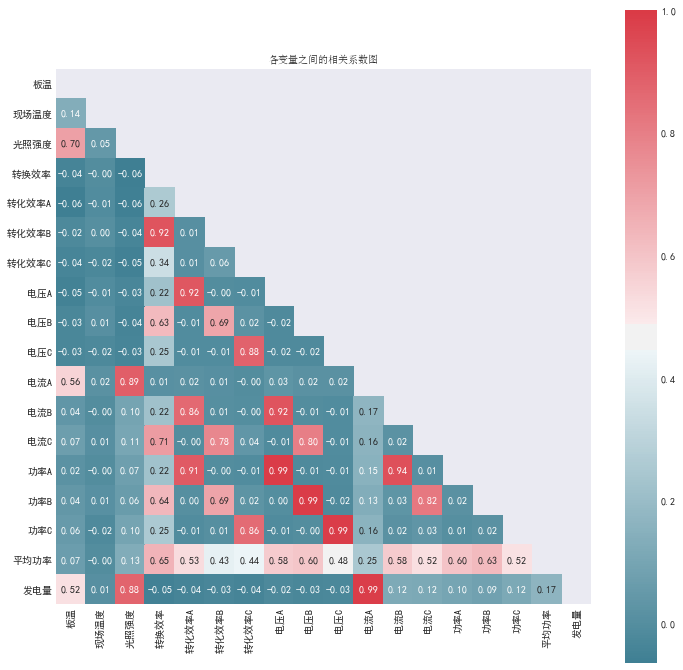

In [7]:
sns.set_style('dark')
plt.figure(figsize=(12,12))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')

mask = np.zeros_like(corrmat,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap=True)


#plt.xlabel('变量',fontproperties=zhfont1)
#plt.ylabel('变量',fontproperties=zhfont1)
plt.title('各变量之间的相关系数图',fontproperties=zhfont1)
sns.heatmap(corrmat , mask=mask , cmap = cmap ,square=True,annot= True,fmt='0.2f')

#### 根据四分位距定义异常值检验

In [8]:
#根据quantile定义的异常值检验
def outiler_testing_quantile(data):
    upper_testing_data =  data.quantile(0.75) + (data.quantile(0.75)-data.quantile(0.25))*1.5
    lower_testing_data =  data.quantile(0.25) - (data.quantile(0.75)-data.quantile(0.25))*1.5
    outiler_count = 0
    outiler_index = list()
    for index,i in enumerate(data):
        if i > upper_testing_data or i < lower_testing_data:
            outiler_count += 1
            outiler_index.append(index)
    if outiler_count > 0:
        print('There are %s outilers '%(outiler_count))
    else:
        print('Therr is no outiler')
    return(list(outiler_index))

In [9]:
print(df.columns)
outilers_quanlile = list()
for i in range(len(df.columns)):
    outilers_quanlile.append(outiler_testing_quantile(df[df.columns[i]]))

Index(['板温', '现场温度', '光照强度', '转换效率', '转化效率A', '转化效率B', '转化效率C', '电压A', '电压B',
       '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '发电量'],
      dtype='object')
Therr is no outiler
There are 11 outilers 
Therr is no outiler
There are 531 outilers 
There are 550 outilers 
There are 531 outilers 
There are 549 outilers 
There are 121 outilers 
There are 105 outilers 
There are 112 outilers 
Therr is no outiler
There are 7 outilers 
There are 6 outilers 
There are 8 outilers 
There are 12 outilers 
There are 8 outilers 
There are 23 outilers 
Therr is no outiler


In [10]:
#把所有的异常值剔除
df_copy = df.copy()
for i in df_copy.columns: 
    upper_testing_data =  df_copy[i].quantile(0.75) + (df_copy[i].quantile(0.75)-df_copy[i].quantile(0.25))*1.5
    lower_testing_data =  df_copy[i].quantile(0.25) - (df_copy[i].quantile(0.75)-df_copy[i].quantile(0.25))*1.5
    df_copy[i][df_copy[i] > upper_testing_data] = None
    df_copy[i][df_copy[i] < lower_testing_data] = None

In [11]:
df_copy.tail(10)

板温  现场温度  光照强度   转换效率  转化效率A  转化效率B  转化效率C    电压A    电压B    电压C  \
8990  31.39  22.5   605  17.90  17.42  17.09  19.19  608.0  604.0  606.0   
8991  31.95  22.8   647  19.70  20.53  19.40  19.16  610.0  602.0  600.0   
8992  32.72  23.0   779  18.19  18.46  18.50  17.60  600.0  600.0  600.0   
8993  34.26  23.3   815  17.51  16.96  17.41  18.15  598.0  595.0  592.0   
8994  34.70  23.6   819  17.20  17.34  17.07  17.18  595.0  595.0  591.0   
8995  35.16  24.6   855  17.42  17.70  17.09  17.48  597.0  592.0  588.0   
8996  36.03  24.8   739  20.28  20.27  20.57  20.01  590.0  591.0  586.0   
8997  36.39  24.9   759  18.11  18.10  18.08  18.14  593.0  591.0  589.0   
8998  36.49  25.2   749  18.00  18.08  18.23  17.68  591.0  588.0  589.0   
8999   0.01   0.1     1   0.00   0.00   0.00   0.00    NaN    NaN    NaN   

       电流A   电流B   电流C      功率A      功率B      功率C     平均功率        发电量  
8990  5.60  5.53  6.19  3404.80  3340.12  3751.14  3498.69   7.004241  
8991  7.05  6.75  6.69  4300.50  4063.50  4014.00  4126.00   8.736486  
8992  7.78  7.80  7.42  4668.00  4680.00  4452.00  4600.00   9.761747  
8993  7.55  7.79  8.16  4514.90  4635.05  4830.72  4660.22   9.939029  
8994  7.81  7.69  7.79  4646.95  4575.55  4603.89  4608.80   9.990341  
8995  8.31  8.09  8.33  4961.07  4789.28  4898.04  4882.80  10.196422  
8996  8.35  8.46  8.30  4926.50  4999.86  4863.80  4930.05  10.430261  
8997  7.63  7.65  7.70  4524.59  4521.15  4535.30  4527.01   9.558046  
8998  7.55  7.65  7.41  4462.05  4498.20  4364.49  4441.58   9.179218  
8999  0.00  0.00  0.00     0.00     0.00     0.00     0.00   0.379993

### 剔除异常值后各变量间的相关系数图

<Figure size 864x864 with 0 Axes>

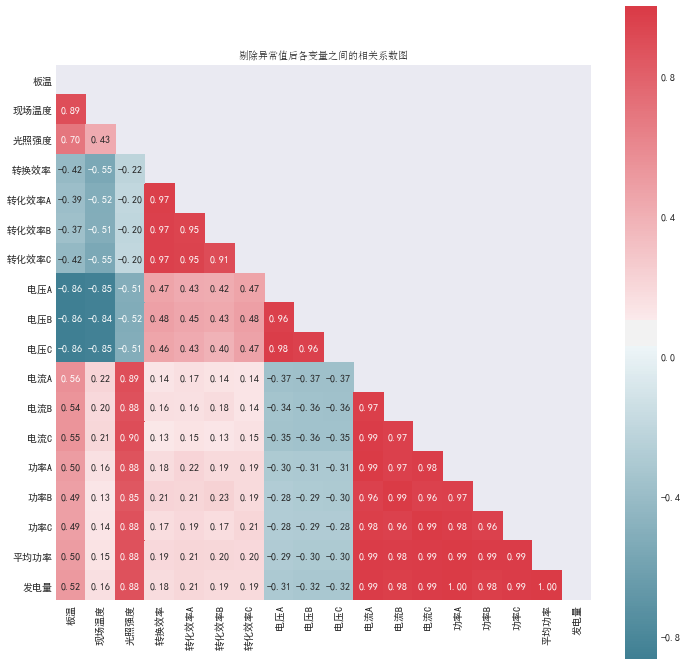

In [12]:
No_outiler_corrmat = df_copy.corr()
sns.set_style('dark')
plt.figure(figsize=(12,12))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')

mask2 = np.zeros_like(corrmat,dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
cmap2 = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize=(12,12))
#plt.xlabel('变量',fontproperties=zhfont1)
#plt.ylabel('变量',fontproperties=zhfont1)
plt.title('剔除异常值后各变量之间的相关系数图',fontproperties=zhfont1)
sns.heatmap(No_outiler_corrmat , mask=mask2 , cmap = cmap2 ,square=True,annot= True,fmt='0.2f')

In [13]:
df = df[['板温','光照强度','电流A','发电量']]

In [14]:
print(df.shape)
print(type(df))
print(df.head())

(9000, 4)
<class 'pandas.core.frame.DataFrame'>
      板温  光照强度   电流A       发电量
0 -19.14    34  1.34  1.437752
1 -18.73    30  1.55  1.692575
2 -17.54    41  1.75  1.975787
3 -15.43    53  2.02  2.370656
4 -14.60    65  2.13  2.532091


Text(0.5,1,'电流A与发电量之间的关系')

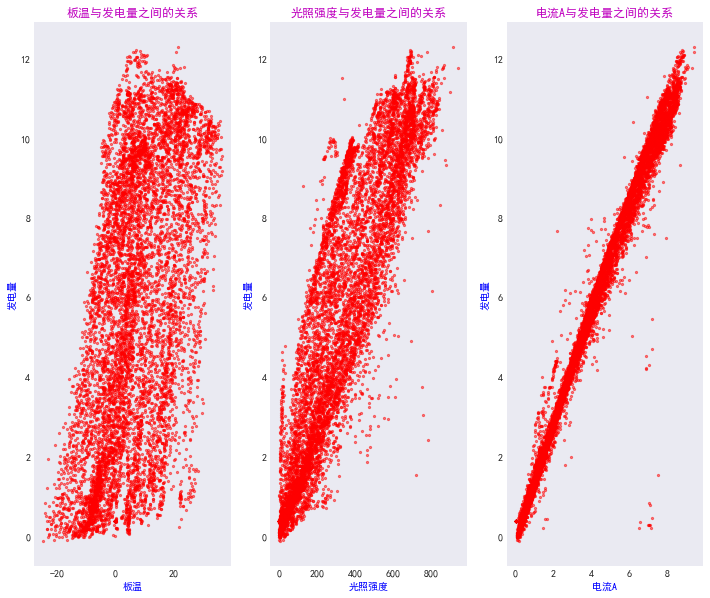

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.scatter(df.板温,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('板温',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('板温与发电量之间的关系',color = 'm')
plt.subplot(1,3,2)
plt.scatter(df.光照强度,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('光照强度',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('光照强度与发电量之间的关系',color = 'm')
plt.subplot(1,3,3)
plt.scatter(df.电流A,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('电流A',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('电流A与发电量之间的关系',color = 'm')

### 只选取一个特征电流A

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm_s1 = ols(formula='df.发电量 ~ df.电流A', data=df).fit()

lm_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 df.发电量   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.111e+05
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:55:53   Log-Likelihood:                -6655.1
No. Observations:                9000   AIC:                         1.331e+04
Df Residuals:                    8998   BIC:                         1.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1977      0.010     19.573      0.000       0.178       0.218
df.电流A         1.3328      0.002    641.197      0.000       1.329       1.337
==============================================================================
Omnibus:                    12232.858   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6542071.696
Skew:                          -7.492   Prob(JB):                         0.00
Kurtosis:                     134.229   Cond. No.                         9.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 画残差图

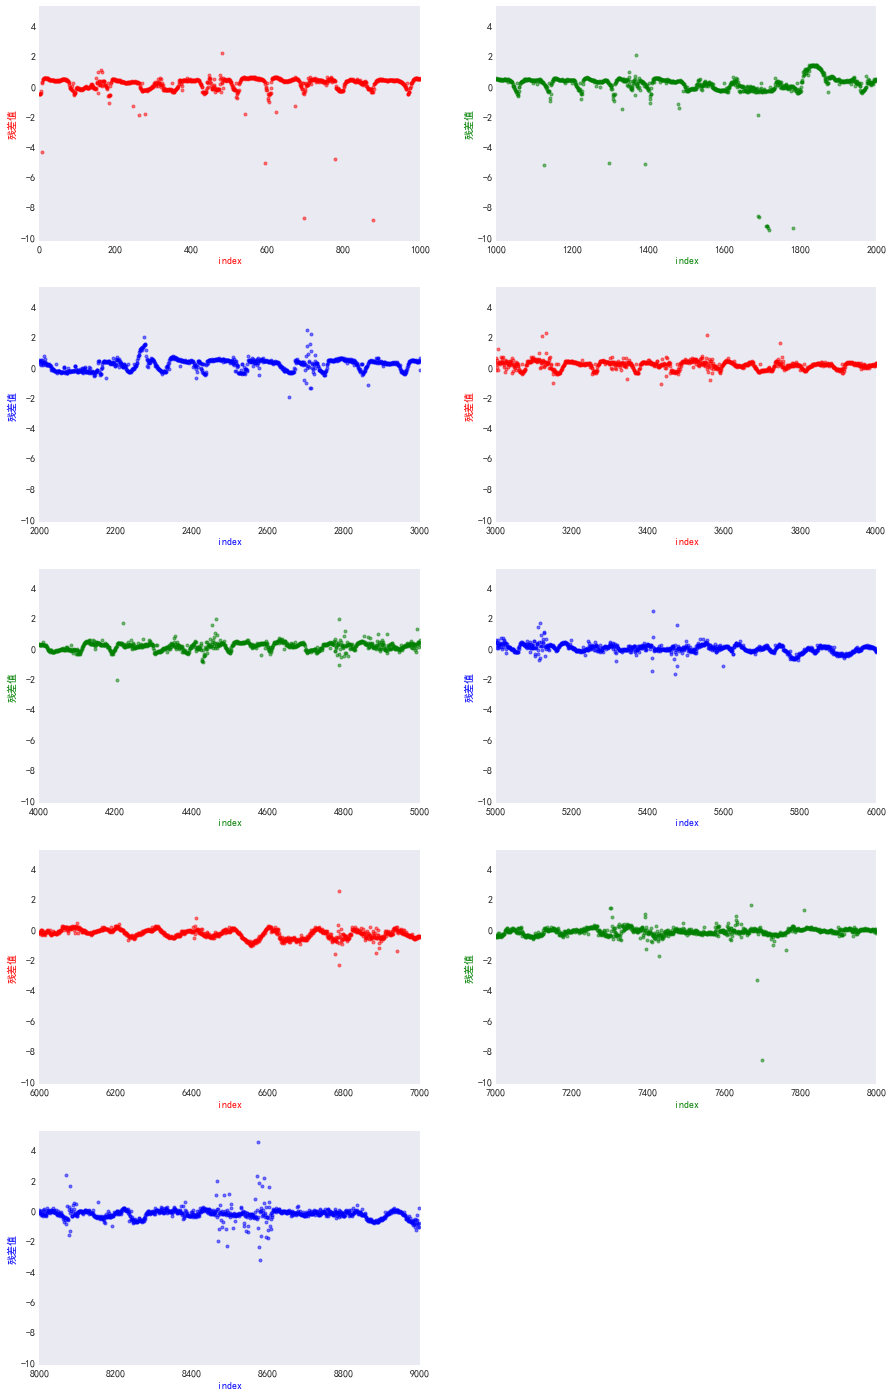

In [17]:
x = df[['板温','光照强度','电流A']]
y = df['发电量']
y_pred1 = lm_s1.predict(x)
error1 = y - y_pred1

def error_plot(error,*kwarg,**kwargs):
    fig = plt.figure(figsize=(15,25))
    colors = 'rgb'*3
    for i in range(1,10):
        plt.subplot(5,2,i)
        plt.plot( error , '.',color = colors[i-1],alpha = 0.5)
        plt.xlim((i-1)*1000,1000*(i))
        plt.xlabel('index',color = colors[i-1])
        plt.ylabel('残差值',color = colors[i-1])

error_plot(error1)

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm_s3 = ols(formula='df.发电量 ~ df.板温 + df.光照强度 +df.电流A', data=df).fit()

lm_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 df.发电量   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.480e+05
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:55:55   Log-Likelihood:                -6314.7
No. Observations:                9000   AIC:                         1.264e+04
Df Residuals:                    8996   BIC:                         1.267e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1250      0.010     12.109      0.000       0.105       0.145
df.板温         -0.0161      0.001    -25.551      0.000      -0.017      -0.015
df.光照强度        0.0005   6.23e-05      7.863      0.000       0.000       0.001
df.电流A         1.3362      0.005    291.951      0.000       1.327       1.345
==============================================================================
Omnibus:                    13135.366   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9315575.965
Skew:                          -8.549   Prob(JB):                         0.00
Kurtosis:                     159.682   Cond. No.                         816.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm_s3.params

Intercept    0.124990
df.板温       -0.016114
df.光照强度      0.000490
df.电流A       1.336211
dtype: float64

### 画残差图

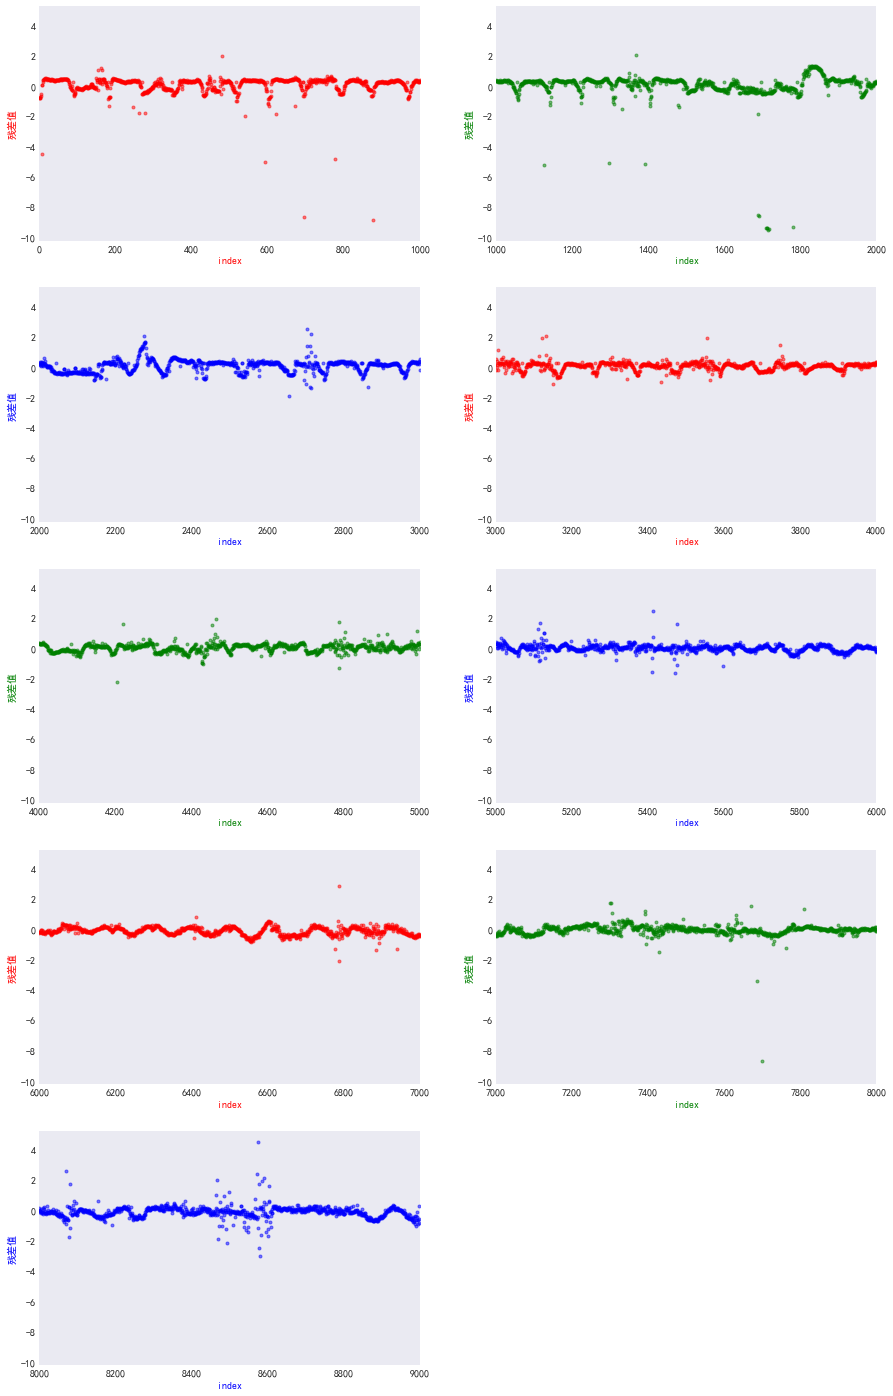

In [20]:
x = df[['板温','光照强度','电流A']]
y = df['发电量']
y_pred3 = lm_s3.predict(x)
error3 = y - y_pred3

error_plot(error3)

### 应变量是否为正态分布

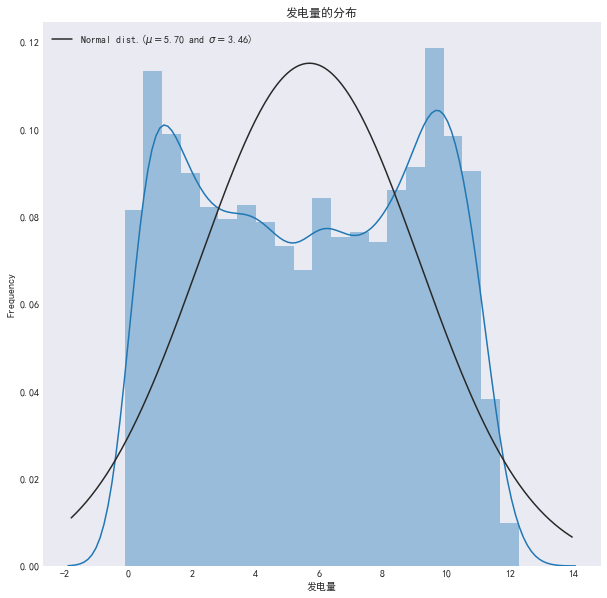

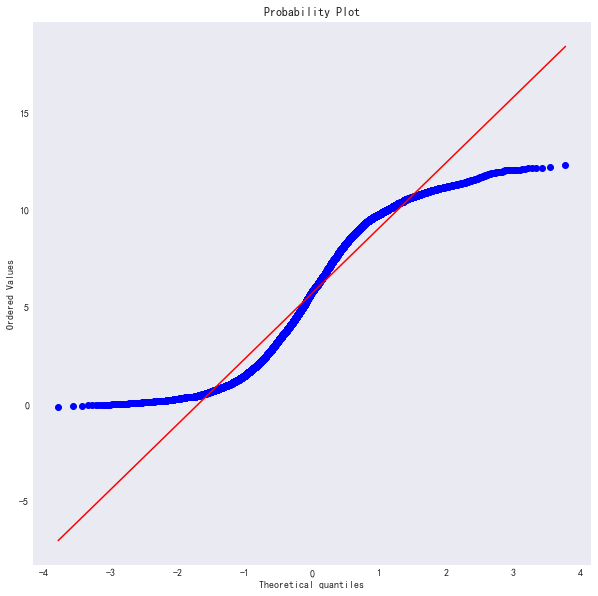

In [162]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(df.发电量,fit=norm)
(mu,sigma) = norm.fit(df.发电量)
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('发电量的分布')
fig  =plt.figure()
res = stats.probplot(df.发电量,plot = plt)

### 应用随机森林和回归树来分析

In [169]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

'''
随机森林回归
回归树
'''
# 1 准备数据

x = df[['板温','光照强度','电流A']]
y = df['发电量']

# 2 分割训练数据和测试数据
# 随机采样25%作为测试 75%作为训练
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

# 3 训练数据和测试数据进行标准化处理
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)

ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

# 4 两种集成回归模型进行训练和预测
# 随机森林回归
rfr = RandomForestRegressor()
# 训练
rfr.fit(x_train, y_train)
# 预测 保存预测结果
rfr_y_predict = rfr.predict(x_test)

# 回归树
tree = DecisionTreeRegressor()
# 训练
tree.fit(x_train, y_train)
# 预测 保存预测结果
tree_y_predict = tree.predict(x_test)


# 5 模型评估
# 随机森林回归模型评估
print("随机森林回归的默认评估值为：", rfr.score(x_test, y_test))
print("随机森林回归的R_squared值为：", r2_score(y_test, rfr_y_predict))
print("随机森林回归的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),
                                          ss_y.inverse_transform(rfr_y_predict)))
print("随机森林回归的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),
                                             ss_y.inverse_transform(rfr_y_predict)))

# 回归树模型评估
print("回归树的默认评估值为：", etr.score(x_test, y_test))
print("回归树的R_squared值为：", r2_score(y_test, gbr_y_predict))
print("回归树的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),
                                            ss_y.inverse_transform(gbr_y_predict)))
print("回归树的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),
                                               ss_y.inverse_transform(gbr_y_predict)))



随机森林回归的默认评估值为： 0.9915309652201164
随机森林回归的R_squared值为： 0.9915309652201163
随机森林回归的均方误差为: 0.10229820409956034
随机森林回归的平均绝对误差为: 0.15028971214362466
回归树的默认评估值为： 0.9913488796075832
回归树的R_squared值为： 0.9913583289837234
回归树的均方误差为: 0.10438349214058379
回归树的平均绝对误差为: 0.15302029765965441


[[0.525 0.    0.    0.475]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]]


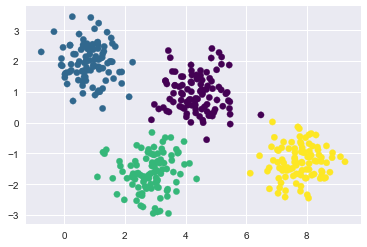

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# 构建示例数据集
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # 为了更好地绘制图像，我们对坐标轴进行了翻转
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

In [4]:
labels

array([0, 2, 2, 0, 2, 3, 1, 0, 2, 1, 3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       3, 0, 0, 3, 3, 0, 0, 1, 0, 0, 2, 0, 2, 3, 1, 0, 1, 0, 2, 3, 1, 0,
       1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 0, 1, 3, 0, 2, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 3, 0, 1, 1, 1, 3, 1, 0, 0, 2, 3, 0, 3, 1, 2,
       2, 2, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 0, 3, 1, 1, 1, 0, 3, 3,
       3, 2, 0, 2, 3, 0, 3, 2, 0, 2, 2, 3, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       3, 2, 1, 2, 2, 2, 0, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1,
       0, 2, 0, 3, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 3, 1,
       1, 0, 0, 2, 1, 1, 3, 0, 2, 3, 0, 3, 0, 0, 1, 1, 3, 1, 0, 3, 1, 3,
       2, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 1, 0, 2, 1, 0,
       0, 3, 1, 0, 3, 0, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 0, 2, 2, 2,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 3,

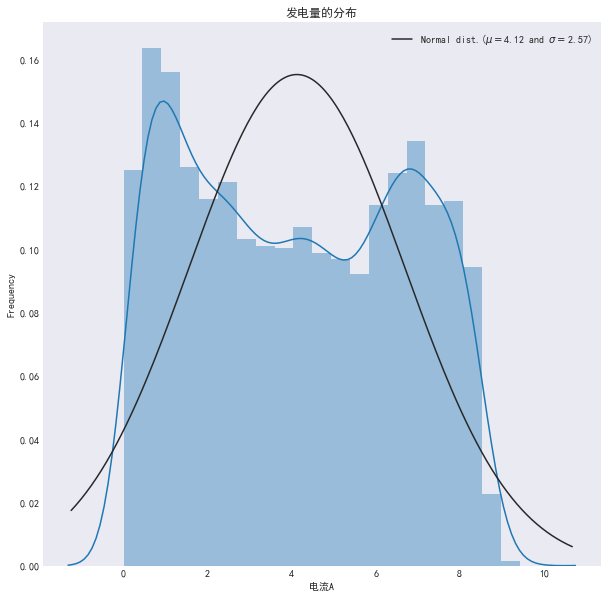

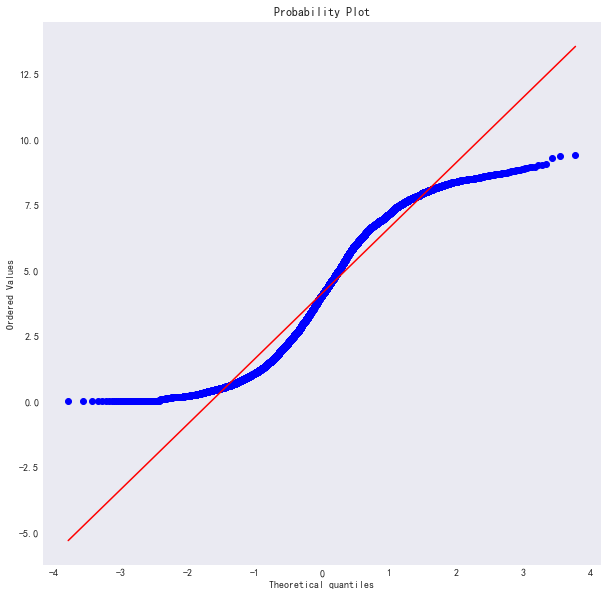

In [30]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(df.电流A,fit=norm)
(mu,sigma) = norm.fit(df.电流A)
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('发电量的分布')
fig  =plt.figure()
res = stats.probplot(df.电流A,plot = plt)

In [25]:
df.光照强度.sort_values()

1402      0
2845      0
2323      0
1873      0
1140      0
2958      0
3067      0
2532      1
5733      1
5843      1
6080      1
6189      1
6295      1
6405      1
6498      1
6609      1
6724      1
2433      1
6821      1
2430      1
2429      1
2428      1
2415      1
348       1
349       1
2233      1
5274      1
2533      1
269       1
8999      1
       ... 
8875    827
8878    827
8879    827
8075    827
8882    828
8883    828
8874    829
8881    830
7727    832
8877    832
8873    832
8062    832
8063    833
8880    834
8566    838
8876    839
8080    842
8079    846
8066    850
8995    855
8065    857
8074    859
8067    861
8064    866
8068    868
8073    874
8578    876
8471    899
8070    913
8071    941
Name: 光照强度, Length: 9000, dtype: int64

1.2204032943178408e+39